In [181]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from geodatasets import get_path

In [2]:
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('/home/cristina/Public/projetos/predict_price/db/teste_indicium_precificacao.csv')

### Análise geral dos dados

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

- Insights

Este dataframe é composto por 16 colunas e 48894 linhas. 
Apenas 2 colunas - **ultima_review** e **reviews_por_mes** - contém dados faltantes de aproxidamente 10.000 linhas em cada coluna. 

In [5]:
def naming(xlabel, ylabel, title):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

### Preço

In [6]:
price = df['price']
price.describe()

count    48894.000000
mean       152.720763
std        240.156625
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

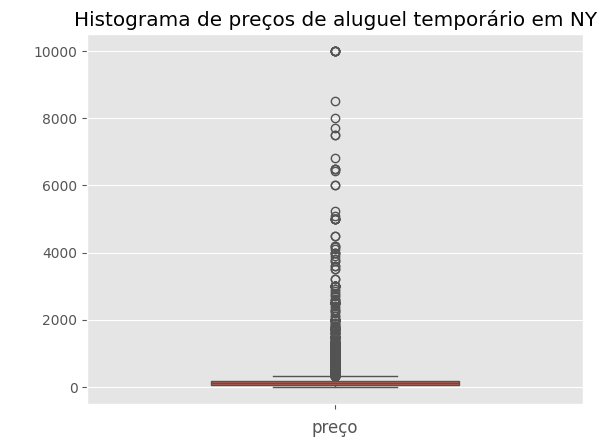

In [7]:
#plt.figure(figsize=(), dpi = 350)
sns.boxplot(
    data = price, 
    orient = 'x',
    width = 0.5
)
naming('preço', ' ', 'Histograma de preços de aluguel temporário em NY')


- Insights

Os preços de aluguel tem uma média de US152,7 com um alto desvio padrão, o que sugere uma grande variação de valores entre US90,00 e US400,00, aproximadamente. No entanto, o valor máximo descrito é de US1000,00. Isso sugere que há outliers na base de dados, como mostra o diagrama de caixa acima.
Outro fator de interesse é que o mínimo é de 0, ou seja, há a possibilidade de alugar um imóvel sem custo. 

In [8]:
def bar(data, xaxis, yaxis):
    ax = sns.barplot(
        data = data, 
        x = xaxis, 
        y = yaxis,
        errorbar=None)
    ax.bar_label(ax.containers[0])

### Mínimo de noites

In [9]:
min_nights = df['minimo_noites']
min_nights.describe()

count    48894.000000
mean         7.030085
std         20.510741
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimo_noites, dtype: float64

- Insigths
  
Este dado mostra a quantidade de dias mínimos passados em um imóvel. A média é de 1 semana, porém o desvio padrão é grande, concluindo que este também apresenta outliers.
Um fator de destaque é que um imóvel pode ser alugado por 1250 noites.

1. Noites por bairro

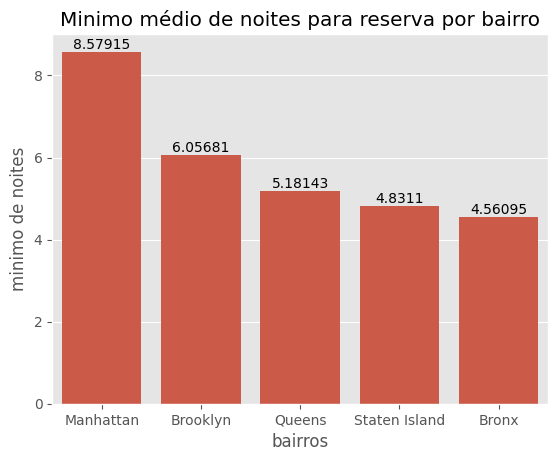

In [10]:
group = df['bairro_group']
bar(df, group, min_nights)
naming('bairros', 'minimo de noites', 'Minimo médio de noites para reserva por bairro')

Este gráfico de barras mostra o número médio mínimo de noites para alugar em cada bairro de Nova Iorque.
Manhattan, como condado de maior densidade populacional e conhecida internacionalmente por abrigar a cultura (Broadway), o financeiro (Wall Street), além de um forte ponto turístico, tem a média mais alta de mínimos por noite que uma pessoa pode alugar. 
Em contrapartida, Staten Island, que é a região menos populosa, apresenta a menor média. 

2. Relação com preço

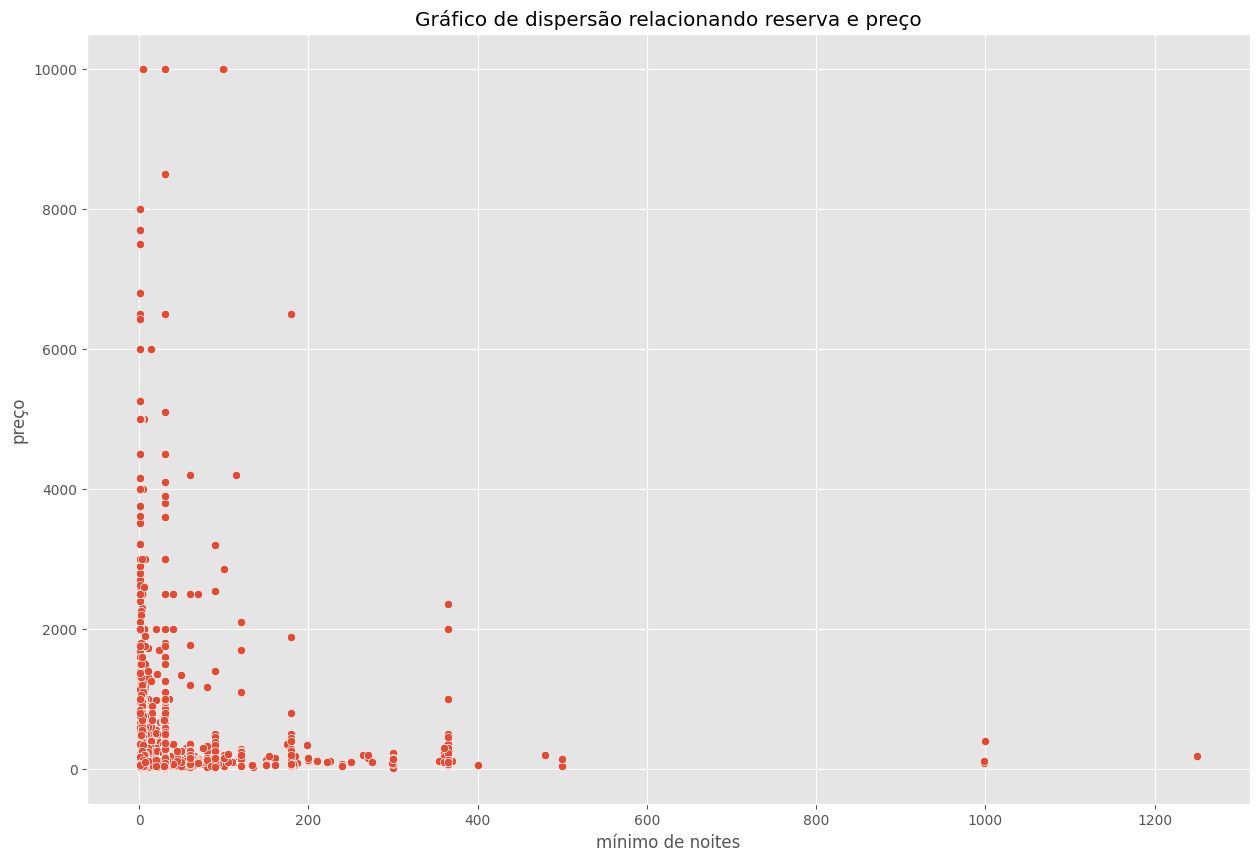

In [11]:
plt.figure(figsize=(15, 10))
sns.scatterplot(
    data = df,
    x = min_nights,
    y = price
)
naming('mínimo de noites', 'preço', 'Gráfico de dispersão relacionando reserva e preço')

O gráfico de dispersão acima mostra que não há relação entre preço e o mínimo de noites para reservas, pois, à medida que o preço aumenta, o número mínimo não aumenta. De fato, demonstra claramente que relação é constante com variações no preço e não no mínimo de reservas.

### Disponibilidade de reserva

In [12]:
available = df['disponibilidade_365']

In [13]:
available.describe()

count    48894.000000
mean       112.776169
std        131.618692
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: disponibilidade_365, dtype: float64

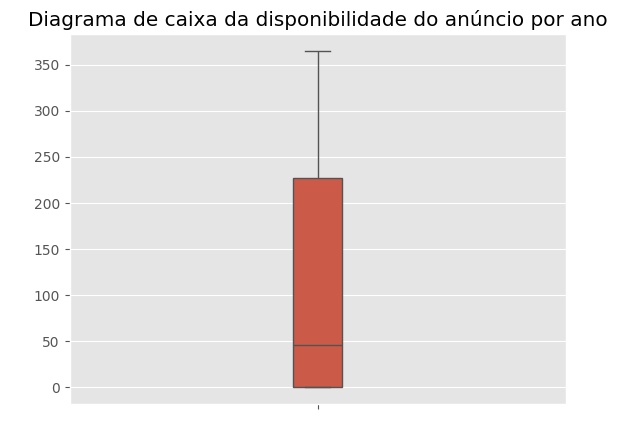

In [14]:
#plt.figure(figsize=(5, 10))
sns.boxplot(
    data = available,
    width = 0.1,
    orient = 'x' 
)
naming(' ', ' ', 'Diagrama de caixa da disponibilidade do anúncio por ano')

Para a coluna disponibilidade_365, o diagrama de caixa mostra que não há outliers, porém, o limite superior é bem acima do ponto médio. A variação está entre 19 e 244 dias, aproximadamente. Um anúncio pode ficar no máximo 1 ano.

1. Relação disponibilidade x preço

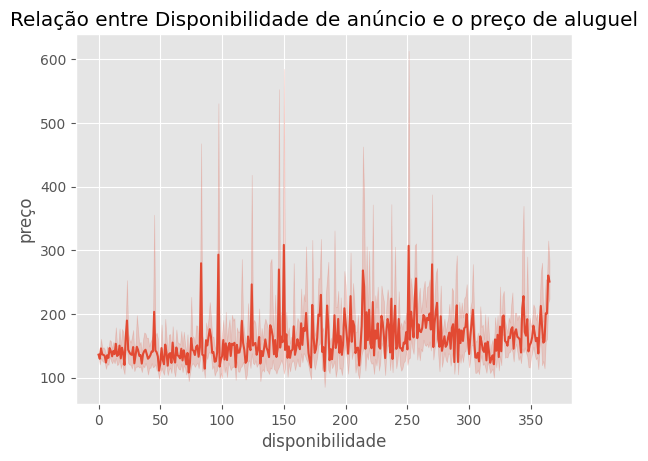

In [15]:
sns.lineplot(
    data = df,
    x = available,
    y = price
)
naming('disponibilidade', 'preço', 'Relação entre Disponibilidade de anúncio e o preço de aluguel')

Analisando o gráfico, nota-se que não há relação direta ou inversa entre os atributos, pois, a linha mantem-se constante apesar da grande variação. Ou seja, disponibilidade dos anúncios não parece interferir no valor do preço.

### Tipo de quarto

In [16]:
room = df['room_type']

In [17]:
room.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

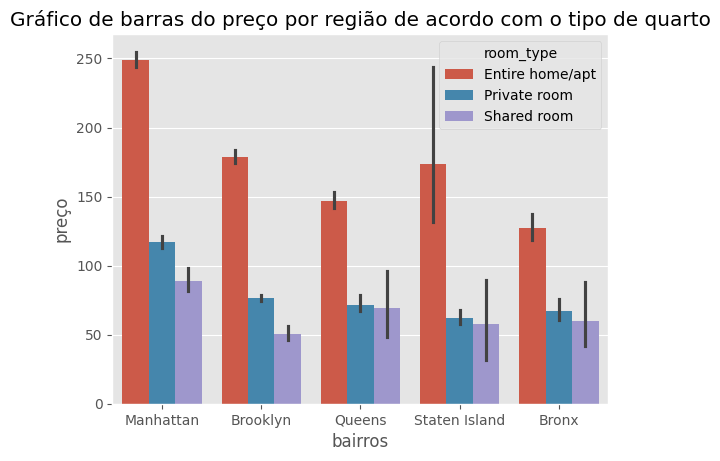

In [18]:
# bar(df, room, price)
# naming('tipo de quarto', 'preço', 'Preço médio por tipo de quarto')

sns.barplot(
    data = df,
    x = group,
    y = price,
    hue = room,
    errorbar = 'ci'
)
naming('bairros', 'preço', 'Gráfico de barras do preço por região de acordo com o tipo de quarto')

Em todos os bairros de NY, o aluguel de uma casa inteira ou apartamento possui as maiores médias. Além disso, nos 5, um quarto compartilhado tem a menor média de valores. 
Note que em Staten Island, tanto apartamento/casa quanto quartos compartilhados, o intervalo de confiança é melhor, o que significa que o valor estimado tem uma maior variação.
Observando o gráfico, parece não haver relação entre o tipo de quarto e o preço de seu aluguel.

### Bairros

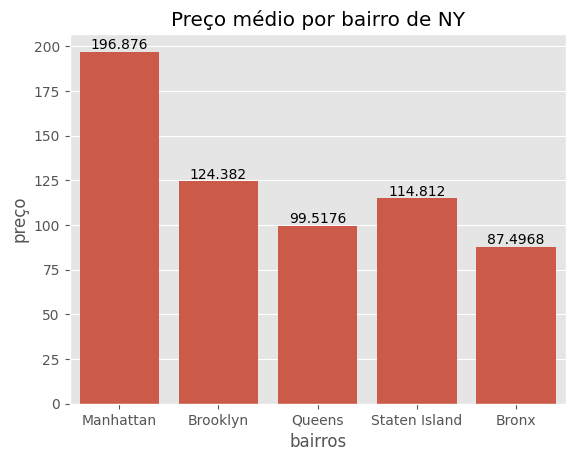

In [19]:
price_b = bar(df, group, price)
naming('bairros', 'preço', 'Preço médio por bairro de NY')

Pode-se notar que Manhattan tem a maior média de preço entre os 5 bairros de NY, devido, provavelmente, as características já discutidas anteriormente. Entretanto, Staten Island é a 3a maior média, considerando que é uma região pouco povoada e sem muitos atrativos tanto residenciais quanto econômicos.
O Bronx possui a menor média. Uma das razões para isso, poderia ser porque, apesar de ser 3o condado mais povoado do estado, é uma região que por muitos anos foi marginalizada. 
O gráfico de barras também mostra que o melhor bairro para se comprar e ter um imóvel para alugar é em Manhattan, já que tem as maiores médias.

In [185]:
mapping = gpd.GeoDataFrame(
    df, 
    geometry = gpd.points_from_xy(df.longitude, df.latitude),
    crs='EPSG:4326'
)

In [186]:
mapping.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,geometry
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,POINT (-73.98377 40.75362)
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,POINT (-73.94190 40.80902)
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,POINT (-73.95976 40.68514)
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,POINT (-73.94399 40.79851)
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,POINT (-73.97500 40.74767)


In [187]:
ny_map = gpd.read_file(get_path('nybb'))
ny_crs = ny_map.to_crs(epsg=4326)

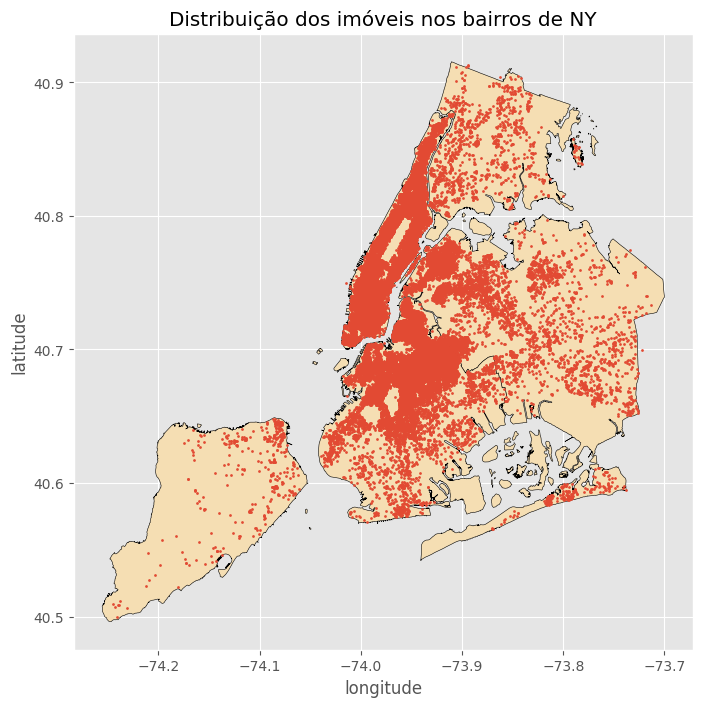

In [188]:
fig, ax = plt.subplots(figsize=(8, 8))

ny_crs.plot(
    ax = ax, 
    color = 'wheat', 
    edgecolor = 'black', 
    linewidth = 0.4)

mapping.plot(
    ax = ax, 
    markersize = 2)

naming('longitude', 'latitude', 'Distribuição dos imóveis nos bairros de NY')

O mapa acima mostra a distribuição de imóveis por aluguel nas regiões de Nova Iorque.
Como previsto, o condado de Manhattan é a que abriga a maior quantidade de imóveis, seguida do Brooklyn enquanto, Staten Island é a que tem a menor número de construções. 
No condado do Queens, a distribuição concentra-se no noroeste, enquanto no Bronx, está no sul, próximo a fronteira com Manhattan.
Com relação a Brooklyn, os aluguéis estão no norte, próxima a fronteira com o Queens e Manhattan.  

### Reviews

In [59]:
reviews = df['numero_de_reviews']

In [60]:
reviews.describe()

count    48894.000000
mean        23.274758
std         44.550991
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: numero_de_reviews, dtype: float64

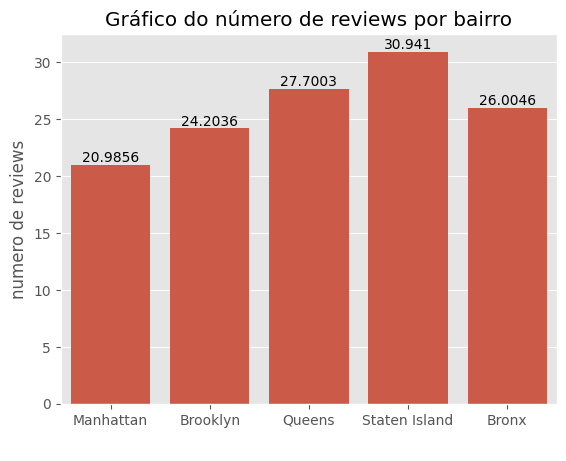

In [67]:
bar(df, group, reviews)
naming(' ', 'numero de reviews', 'Gráfico do número de reviews por bairro')

Interessante relação entre reviews e os bairros: a população de Staten Island tem maior possibilidade de comentar sobre os imóveis do que as de Manhattan. Isso revela as características das pessoas de cada região da cidade.

### Nome do anúncio

In [151]:
name.describe()

count              48878
unique             47904
top       Hillside Hotel
freq                  18
Name: nome, dtype: object

In [180]:
top_25 = df.query('price > 69')
top_25['nome'].describe()

count              36511
unique             35905
top       Hillside Hotel
freq                  18
Name: nome, dtype: object

In [170]:
top_50 = df.query('price > 106')
top_50['nome'].describe()

count              24413
unique             24059
top       Hillside Hotel
freq                  17
Name: nome, dtype: object

In [179]:
top_75 = df.query('price > 1000')
top_75['nome'].describe()

count                                                  239
unique                                                 238
top       Chelsea Gallery Space for events and exhibitions
freq                                                     2
Name: nome, dtype: object

In [178]:
top_80 = df.query('price > 6000')
top_80['nome'].describe()

count                                   16
unique                                  16
top       SUPER BOWL Brooklyn Duplex Apt!!
freq                                     1
Name: nome, dtype: object

Observando os dados estatísticos da coluna 'Nome', não parece haver padrão nos nomes para lugares de maior valor, pois, à medida que o preço cresce, o valor 'top' muda. 
O padrão nos nomes parece estar no 1o e 2o quartil do boxplot, uma vez que nestes o valor 'top' mantém-se no nome 'Hillside Hotel' com a mesma frequência de 18.